In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
from sklearn.datasets import load_iris

In [52]:
ds=load_iris()
dir(ds)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [53]:
df=pd.DataFrame(ds.data,columns=ds.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [54]:
df=df.drop(['sepal length (cm)','sepal width (cm)'], axis='columns')
df.head()


,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Text(0, 0.5, 'petal width(cm)')

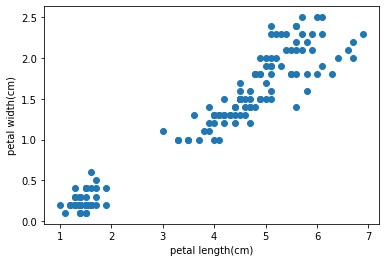

In [55]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])
plt.xlabel('petal length(cm)')
plt.ylabel('petal width(cm)')

In [56]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [57]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['petal length (cm)']],df[['petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [58]:
df['cluster']=y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [59]:
km.cluster_centers_

array([[5.62826087],
       [1.462     ],
       [4.29074074]])

In [60]:
df.cluster.unique()

array([1, 2, 0], dtype=int64)

In [61]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

Text(0, 0.5, 'petal width (cm)')

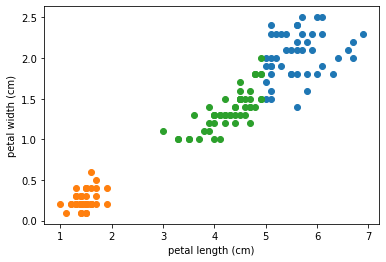

In [63]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'])
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'])
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')


In [64]:
sse=[]
k_range=range(1,10)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

Text(0, 0.5, 'sse')

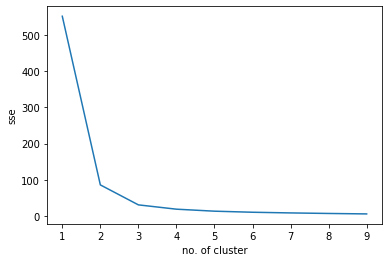

In [65]:
plt.plot(k_range,sse)
plt.xlabel('no. of cluster')
plt.ylabel('sse')